# SiPM/APD/MPPC simulation framework: RiCH example

### Module for testing Silicon Photo-Multipliers and Multi-Pixel Photon Counters. This python module allows users to performe noise analysis of SiPM/MPPCs: Dark Count Rate, Afterpulsing, and Crosstalk. Futhermore, the SiPM/MPPC module is capable to set SiPM arrays (MPPC) for large areas like Ring Imaging Cherenkov detectors, Cherenkov Telescopes, etc. Users can simulate ring or shower shape signals based on the expected number of photons generated by the source.

Author: Dr. Jesús Peña Rodríguez\
Experiment: Compressed Baryonic Matter (CBM)\
Bergische Universität Wuppertal\
May, 2024

In [1]:
import SiPM_MPPC.sipm as sipm
import matplotlib.pylab as plt
import numpy as np

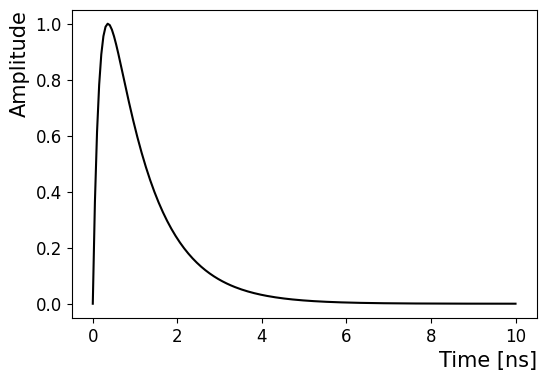

In [2]:
# Pulse shape

Rt = 0.2e-9 # Rising time 5 
Ft = 1e-9   # Falling time 50
A = 1 # Pulse amplitude (spe) single photo-electron
R = 0.05 # Time resolution in ns 1

# Pixel model

DCR = 150e3  # Hz/mm2
Pixel_size = 36.0 # mm2
Cross = 0.25 # %
After = 0.05 # %
T_rec = 55e-9
T_AP = 15e-9
sigma = 0.1 # Pulse amplitude variance
W = 1000 # Recording window in ns

Pulse_shape = sipm.Pulse(Rt, Ft, A, R, plot=True)

In [3]:
# MPPC model

M = 8 # M x M array szie
N_pixel = M*M

Channels, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, T_rec, T_AP, W, R, sigma)

In [ ]:
# Large area detector

Nr = 20 # Number of rows
Nc = 20 # Number of columns
Th = 0.5 # Theshold in photo-electrons (pe)
t0 = 400 # Initial time of trigger in ns
Window = 5 # Coincidence window in ns

Noise_cam = sipm.Camera_noise(Pulse_shape, N_pixel, Pixel_size, M, DCR, Cross, After, T_rec, T_AP, W, R, sigma, Nr, Nc, t0, Window, Th)

In [ ]:
# Ring generation

r  = 6.0 # Cherenkov ring diameter in cm
Np_ring = 27 # Number of photons per ring
N_rings = 20 # Number of rings
    
Ring_array = sipm.Ring_generator(Nr, Nc, r, M, Np_ring, N_rings)

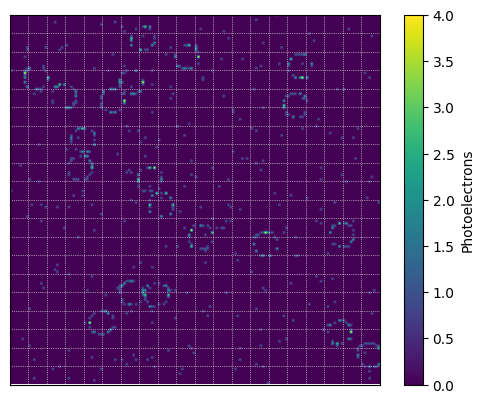

In [14]:
# Event plot

sipm.Camera_plot(Ring_array, Noise_cam, M, Nr, Nc)
# plt.savefig("Figures/Camera.eps", bbox_inches='tight', dpi=300)

Signal 0.870588
Noise 0.052083


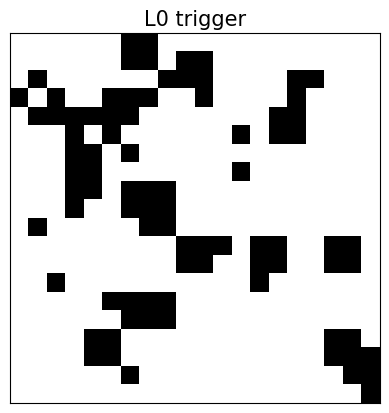

In [9]:
# Majority trigger 

L0_threshold=3

L0_Ring = sipm.voting_trigger(Ring_array, Noise_cam, M, Nr, Nc, L0_threshold, cmap='Greys')
# plt.savefig("Figures/Rich_trigger_10hits.eps", bbox_inches='tight', dpi=100)